### 6.1. 모평균에 관한 추론

**일표본 T-검정**

예 1)

In [16]:
import numpy as np
from scipy import stats

score = np.array([22, 25, 34, 35, 41, 41, 46, 46, 46, 47, 49, 54, 54, 59, 60])
print(stats.ttest_1samp(score, popmean = 40))
print("xbar = %.3f sd = %.3f" % (np.mean(score), np.std(score, ddof = 1)))
print("tstat= %.3f" % ((np.mean(score) - 40)/np.std(score, ddof = 1) * np.sqrt(15)))


Ttest_1sampResult(statistic=1.354469698602765, pvalue=0.1970442368445378)
xbar = 43.933 sd = 11.247
tstat= 1.354


단측 검정의 유의확률은 2로 나눠줘야 함

In [9]:
0.1970442368445378 / 2

0.0985221184222689

평균에 대한 95% 신뢰구간

In [11]:
from scipy.stats import t
tt = t.ppf(0.975, df = 14) # 분위수

print(np.mean(score) - tt * np.std(score, ddof = 1) / np.sqrt(15))
print(np.mean(score) + tt * np.std(score, ddof = 1) / np.sqrt(15))

37.704946695244814
50.161719971421846


정규분포 가정에 대한 확인

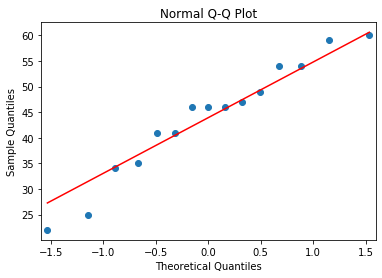

0.9483703970909119 0.49916043877601624


In [17]:
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import ProbPlot
from scipy.stats import shapiro

# 정규분포 분위수 대조도
QQ = ProbPlot(score)
plot = QQ.qqplot(line = 's', color = 'C0', lw = 1)
plt.title("Normal Q-Q Plot")
plt.show()

# Shapiro-Wilk's Normality Test
stat, p = shapiro(score)
print(stat, p)

예 2)

In [20]:
can = np.array([408, 405, 397, 405, 395, 415, 389, 403, 397, 390])
print(stats.ttest_1samp(can, popmean = 400))
print("xbar = %.3f sd = %.3f" % (np.mean(can), np.std(can, ddof = 1)))
print("tstat= %.3f" % ((np.mean(can) - 400)/np.std(can, ddof = 1) * np.sqrt(10)))

tt = t.ppf(0.95, df = 9) # 분위수
start = np.mean(can) - tt * np.std(can, ddof = 1) / np.sqrt(10)
end = np.mean(can) + tt * np.std(can, ddof = 1) / np.sqrt(10)
print("(", start, ", ", end, ")")

Ttest_1sampResult(statistic=0.15359390551473265, pvalue=0.8813187090682193)
xbar = 400.400 sd = 8.235
tstat= 0.154
( 395.62607898663606 ,  405.1739210133639 )


### 6.2. 대응비교에 의한 모평균의 비교
**대응비교/쌍체비교**

예1)

In [27]:
import pandas

paired = pandas.read_csv("week_6/paired.txt", sep = " ")
print(paired.head())
print(paired.shape)

   purple  green
1     3.1    2.2
2     3.7    2.7
3     4.0    3.1
4     3.2    2.9
5     3.6    3.3
(14, 2)


아래 T검정 결과를 보면 
1. 기각역에 비해 검정통계량 값 6.3381이 작고
2. 유의확률이 0.00002584로 매우 작기 때문에 

귀무가설 기각할 수 있다

In [29]:
stats.ttest_rel(paired.purple, paired.green)

Ttest_relResult(statistic=6.3380731434065325, pvalue=2.5838913496640584e-05)

In [40]:
diff = paired.purple - paired.green

tt = t.ppf(0.975, df = 13)
start = np.mean(diff) - tt * np.std(diff, ddof = 1) / np.sqrt(14)
end = np.mean(diff) + tt * np.std(diff, ddof = 1) / np.sqrt(14)

print("(%.6f, %.6f)" % (start, end))

(0.461401, 0.938599)


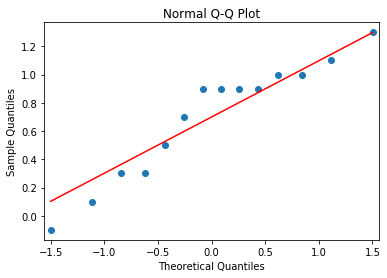

0.9203648567199707 0.22256828844547272


In [41]:
# 정규분포 분위수 대조도
QQ = ProbPlot(diff)
plot = QQ.qqplot(line = 's', color = 'C0', lw = 1)
plt.title("Normal Q-Q Plot")
plt.show()

# Shapiro-Wilk's Normality Test
stat, p = shapiro(diff)
print(stat, p)

예2) -3.24,  pvalue = 0.004, 정규분포 잘 따른다

In [42]:
before = np.array([18, 21, 16, 22, 19, 24, 17, 21, 23, 18, 14, 16, 16, 19, 18, 20, 12, 22, 15, 17])
after = np.array([22, 25, 17, 24, 16, 29, 20, 23, 19, 20, 15, 15, 18, 26, 18, 24, 18, 25, 19, 16])
stats.ttest_rel(before, after)

Ttest_relResult(statistic=-3.231252665580312, pvalue=0.004394965993185664)

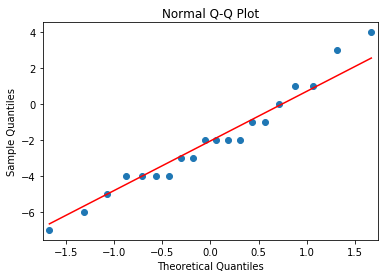

0.968596339225769 0.7249979376792908


In [43]:
diff = before - after

# 정규분포 분위수 대조도
QQ = ProbPlot(diff)
plot = QQ.qqplot(line = 's', color = 'C0', lw = 1)
plt.title("Normal Q-Q Plot")
plt.show()

# Shapiro-Wilk's Normality Test
stat, p = shapiro(diff)
print(stat, p)

### 6.3. 이표본에 의한 모평균의 비교

### 6.4. 두 모분산에 관한 추론
함수를 직접 구현해야 함

[1] **F 검정** : 등분산성의 검정 

예제 1)

In [57]:
paint = pandas.read_csv("week_6/paint.txt", sep = " ")
paint.head()

,group,time
1,1,49
2,1,44
3,1,47
4,1,44
5,1,46


In [58]:
groupby_group = paint.groupby('group') 
groupby_group.mean()

,time
group,
1,45
2,42


In [74]:
from scipy.stats import f

def var_test(sample1, sample2):
    n1 = len(sample1)
    n2 = len(sample2)
    
#     S1 = sum((sample1 - sample1.mean())**2) / (n1 - 1)
#     S2 = sum((sample2 - sample2.mean())**2) / (n2 - 1)
    S1 = np.var(sample1, ddof = 1)
    S2 = np.var(sample2, ddof = 1)
    
    dfn = n1 - 1
    dfd = n2 - 1
    
    F = S1/S2
    
    pval = 2 * min(f.cdf(F, dfn, dfd), 1 - f.cdf(F, dfn, dfd))
    
    print(" F test to compare two variances: F = %s\n num df = %s\n denom df = %s\n p-value = %s" % (round(F, 5), dfn, dfd, round(pval, 5)))

group1 = paint[paint.group == 1].time
group2 = paint[paint.group == 2].time
var_test(group1, group2)

 F test to compare two variances: F = 1.83333
 num df = 9
 denom df = 9
 p-value = 0.37999


In [76]:
stats.ttest_ind(group1, group2, equal_var = True)

Ttest_indResult(statistic=2.8180093098831724, pvalue=0.0113883036492929)

In [77]:
0.0113883036492929 / 2

0.00569415182464645

In [78]:
# 정규분포 가정에 대한 확인까지 해야 문제 온전히 푼 것

예 2)

In [79]:
group1 = np.array([22, 23, 25, 26, 27, 19, 22, 28, 33, 24])
group2 = np.array([21, 25, 36, 24, 33, 28, 29, 31, 30, 32, 33, 35])

### 6.5. 자료를 이용한 예제

예제 1)

- 73개의 강의 선택, 각 강의에 쓰이는 교재는 일치
- 동일한 교재의 온라인 오프라인이므로 독립이 아닌 쌍체로 볼 수 있음.
- 따라서 대응 비교를 수행해야 한다.

In [95]:
import pandas
data = pandas.read_csv("week_6/textbooks.txt", sep = " ")
data.head()

,deptAbbr,course,ibsn,uclaNew,amazNew,more,diff
1,Am Ind,C170,978-0803272620,27.67,27.95,Y,-0.28
2,Anthro,9,978-0030119194,40.59,31.14,Y,9.45
3,Anthro,135T,978-0300080643,31.68,32.00,Y,-0.32
4,Anthro,191HB,978-0226206813,16.00,11.52,Y,4.48
5,Art His,M102K,978-0892365999,18.95,14.21,Y,4.74


In [ ]:
plt.scatter(data)
plt.show()

In [97]:
stats.ttest_rel(data.uclaNew, data.amazNew)

Ttest_relResult(statistic=7.648771112479753, pvalue=6.927581126065491e-11)

**정규분포 가정 확인**

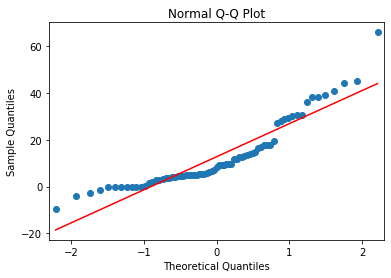

0.8645144104957581 1.3152488236300997e-06


In [96]:
diff = data.uclaNew - data.amazNew

# 정규분포 분위수 대조도
QQ = ProbPlot(diff)
plot = QQ.qqplot(line = 's', color = 'C0', lw = 1)
plt.title("Normal Q-Q Plot")
plt.show()

# Shapiro-Wilk's Normality Test
stat, p = shapiro(diff)
print(stat, p)


정규분포가 아니다.
1. 
2. 비모수 방법을 택한다 (수업의 수준 초과)
     - 부채꼴이 점점 넓어지고 퍼지는 분포를 가진다.
     - 따라서 **log transformation**을 통해 편차를 줄이는 방법을 선택하곤 한다.


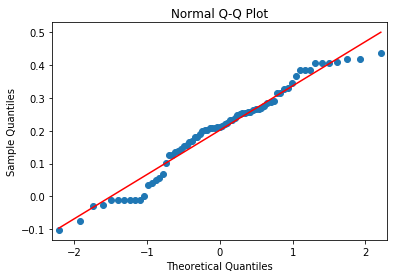

0.9612739682197571 0.024542562663555145


In [98]:
diff = np.log(data.uclaNew) - np.log(data.amazNew)

# 정규분포 분위수 대조도
QQ = ProbPlot(diff)
plot = QQ.qqplot(line = 's', color = 'C0', lw = 1)
plt.title("Normal Q-Q Plot")
plt.show()

# Shapiro-Wilk's Normality Test
stat, p = shapiro(diff)
print(stat, p)

예제 2)